In [9]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pickle
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform


In [3]:
df = pd.read_csv("cleaned_heart_disease_data.csv")

In [ ]:
X = df.drop(columns=['num'])
df['num'] = np.where(df['num']>0,1,0)
y = df['num']

<Axes: >

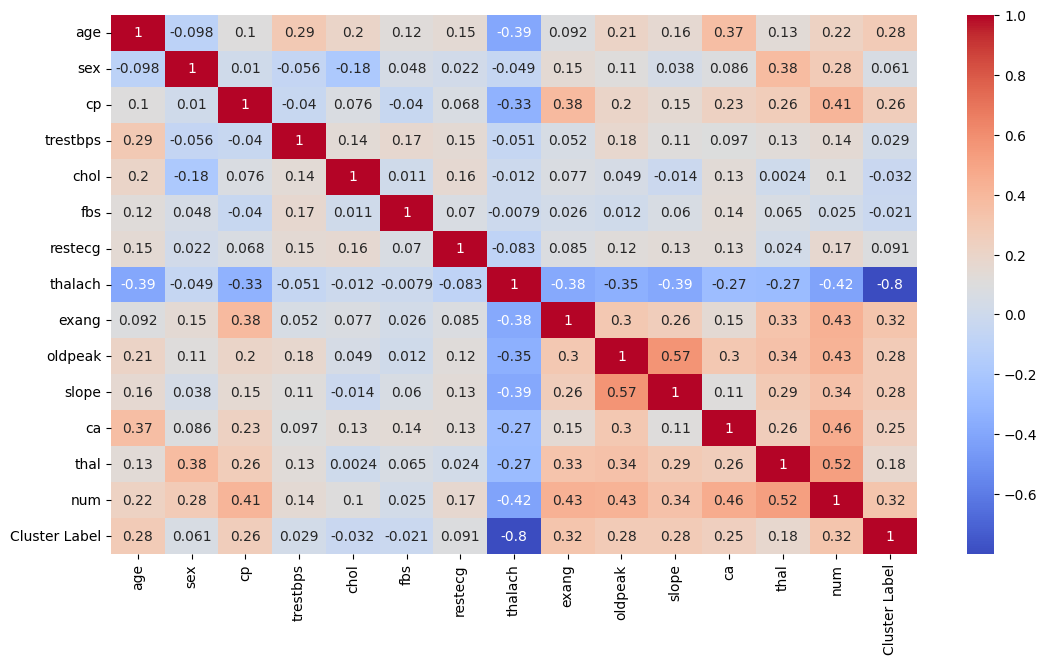

In [6]:
plt.figure(figsize=(13,7))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


### PCA 


Explained variance ratio of 13 components: [7.20589561e-01 1.71427652e-01 8.70644480e-02 1.84260667e-02
 1.16672682e-03 3.59108536e-04 2.83486069e-04 2.54222048e-04
 2.00902829e-04 6.83730052e-05 5.58491554e-05 4.64165406e-05
 3.69829877e-05]
                    PC1       PC2       PC3       PC4       PC5       PC6  \
age            0.040849 -0.178669  0.145356  0.971683 -0.000762 -0.015008   
sex           -0.001808 -0.000920 -0.001084 -0.005135  0.097925 -0.009484   
cp             0.001549 -0.013406 -0.005779 -0.005382  0.125301  0.179266   
trestbps       0.056883 -0.092635  0.979915 -0.166065 -0.015387 -0.007024   
chol           0.997481  0.022460 -0.060665 -0.028799  0.000231 -0.002500   
fbs            0.000117 -0.000406  0.003651  0.003319  0.009146  0.004695   
restecg        0.003470 -0.003993  0.006809  0.006535  0.004479  0.483224   
thalach       -0.009954  0.978482  0.121085  0.162281  0.029492  0.014663   
exang          0.000795 -0.007513 -0.000492 -0.006932  0.065362 

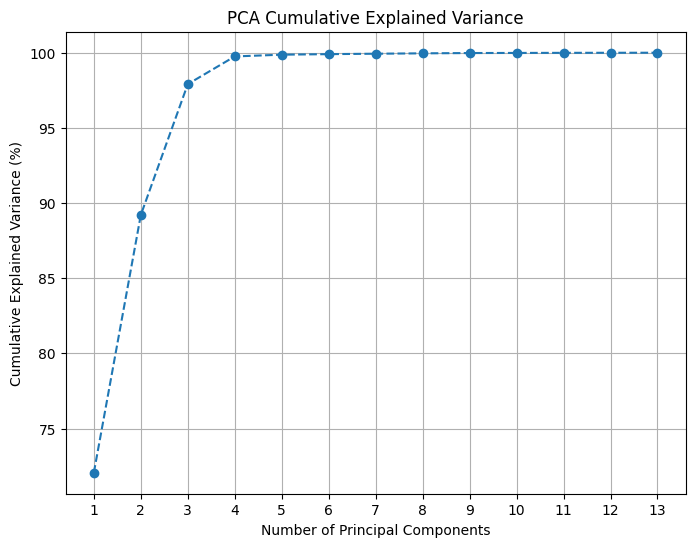

In [10]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=13)
X_pca = pca.fit(X)

print("Explained variance ratio of 13 components:", pca.explained_variance_ratio_)

explained_variance_ratio = pca.explained_variance_ratio_

cumulative_variance = np.cumsum(pca.explained_variance_ratio_) * 100

# Loadings: correlation of each original feature with each principal component
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(len(pca.components_))], index=X.columns)
print(loadings)



plt.figure(figsize=(8,6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('PCA Cumulative Explained Variance')
plt.xticks(range(1, len(cumulative_variance) + 1))
plt.grid(True)
plt.show()


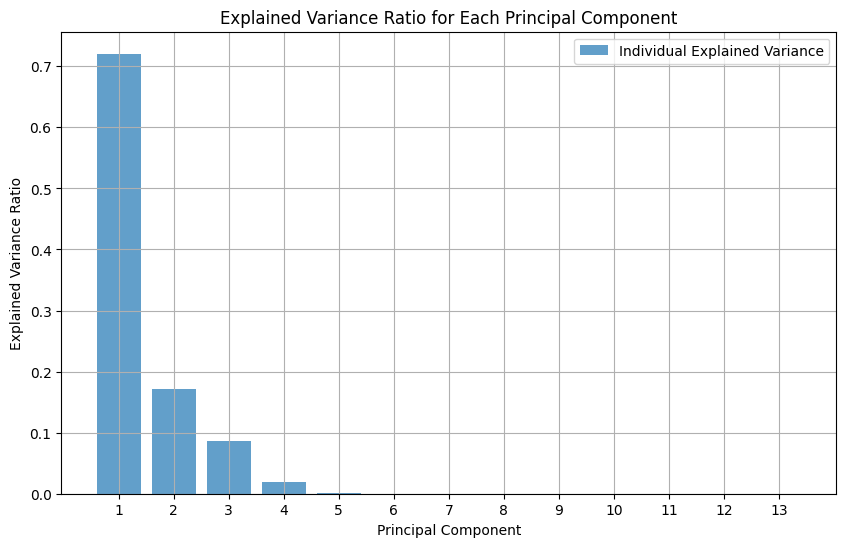

In [11]:

plt.figure(figsize=(10,6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, label='Individual Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Each Principal Component')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [12]:
Pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Construct Parameter Grid
params = {'pca__n_components' : [1,2,3,4,5]} 

PCs = GridSearchCV(estimator=Pipe, param_grid=params, cv=5, scoring='accuracy')
PCs.fit(X, y)

print(f"Best Number of PCs components = {PCs.best_params_['pca__n_components']}\n") # best_params_ returns a dictionary data type

Best Number of PCs components = 5



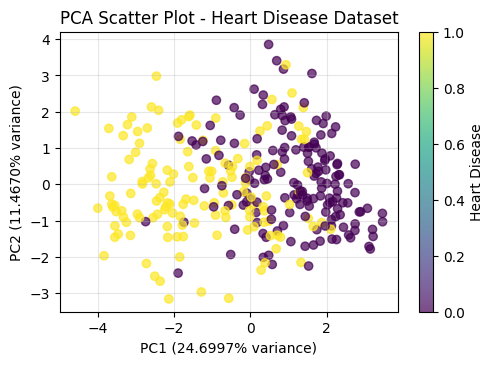

In [13]:
pca = PCA(n_components=5, random_state=42)
features_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=features_pca, columns=['PC1', 'PC2','PC3', 'PC4', 'PC5'])
pca_df['Target'] = y

# Create the scatter plot
plt.figure(figsize=(12, 8))

# Basic scatter plot
plt.subplot(2, 2, 1)
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Target'], alpha=0.7)
plt.colorbar(scatter, label='Heart Disease')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.4%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.4%} variance)')
plt.title('PCA Scatter Plot - Heart Disease Dataset')
plt.grid(True, alpha=0.3)